# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Desti Nur Irawati]
- **Email:** [11221033@student.itk.ac.id]
- **ID Dicoding:** [desssti06]

## Menentukan Pertanyaan Bisnis

- **Bagaimana tren penggunaan sepeda berdasarkan musim (spring, summer, fall, winter)?**
- **Seberapa besar perbedaan rata-rata jumlah penyewaan sepeda antara hari kerja dan akhir pekan dalam setahun terakhir?**
- **Bagaimana cuaca mempengaruhi jumlah penyewaan sepeda?**
- **Seberapa besar pengaruh temperatur dan kelembaban terhadap jumlah penyewaan sepeda?**
- **Bagaimana tren penyewaan sepeda dari tahun 2011 ke 2012?**
- **Kapan terakhir penyewa melakukan penyewaan sepeda?**
- **Seberapa sering seorang penyewa melakukan penyewaan sepeda dalam beberapa bulan terakhir?**
- **Berapa banyak uang yang dihabiskan penyewa dalam beberapa bulan terakhir?**

## Import Semua Packages/Library yang Digunakan

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [288]:
day_df = pd.read_csv("https://raw.githubusercontent.com/desssti06/Bike-sharing-dataset-/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [289]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/desssti06/Bike-sharing-dataset-/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Insight:
- dalam proses gathering data terdapat 2 table yang akan digunakan
- kedua table ini nantinya akan di merge untuk melihat apa yang dapat diceritakan dari data set ini

### Assessing Data

menilai table day

In [290]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [291]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [292]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())

Jumlah duplikasi:  0


In [293]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Insight:
pada table day cukup bersih, tidak ada data kosong dan juga duplikat

#### menilai table hour

In [294]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [295]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [296]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [297]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Insight: pada table hour cukup bersih, tidak ada data kosong dan juga duplikat

### Cleaning Data

In [298]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [299]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [300]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [301]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Mengkonversi tipe data pada dataframe agar lebih sesuai.

Insight: data set cukup bersih, sehingga dapat melanjutkan ke tahap selanjutnya

## Exploratory Data Analysis (EDA)

Explore table day

In [302]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
452,453,2012-03-28,2,1,3,0,3,1,1,0.484167,0.470950,0.481250,0.291671,674,5024,5698
534,535,2012-06-18,2,1,6,0,1,1,2,0.568333,0.544842,0.777917,0.174746,653,4446,5099
364,365,2011-12-31,1,0,12,0,6,0,1,0.410000,0.414121,0.615833,0.220154,665,1820,2485
335,336,2011-12-02,4,0,12,0,5,1,1,0.314167,0.331433,0.625833,0.100754,268,3672,3940


In [303]:
day_df.groupby("season").size().reset_index(name="count").sort_values(by="count", ascending=False)

,season,count
2,3,188
1,2,184
0,1,181
3,4,178


insight :
- dapat di ketahui penyewa terbanyak terdapat di season summer 
- dengan catatan (1:springer, 2:summer, 3:fall, 4:winter)

In [304]:
day_df.groupby("yr").size().reset_index(name="count").sort_values(by="count", ascending=False)

,yr,count
1,1,366
0,0,365


insight : 
dapat di ketahui penyewa terbanyak terdapat di tahun 2012
(0: 2011, 1:2012)

In [305]:
day_df.groupby("mnth").size().reset_index(name="count").sort_values(by="count", ascending=False)

,mnth,count
0,1,62
2,3,62
6,7,62
4,5,62
11,12,62
9,10,62
7,8,62
3,4,60
8,9,60
5,6,60


insight : 
- dapat di ketahui penyewa di bulan 1,3,7,5,12,10, dan 8 stabil di angka 62
- bulan 4,9,6,11 di angka 60
- bulan 2 di angka 57

In [306]:
day_df.groupby("holiday").size().reset_index(name="count").sort_values(by="count", ascending=False)

,holiday,count
0,0,710
1,1,21


**insight**
dapat di ketahui penyewa terbanyak terdapat pada saat tidak holiday

In [307]:
day_df.groupby("weekday").size().reset_index(name="count").sort_values(by="count", ascending=False)

,weekday,count
0,0,105
1,1,105
6,6,105
2,2,104
3,3,104
4,4,104
5,5,104


insight : dapat diketahui tidak ada perbedaan signifikan tiap harinya

In [308]:
day_df.groupby("workingday").size().reset_index(name="count").sort_values(by="count", ascending=False)

,workingday,count
1,1,500
0,0,231


insight : dapat di ketahui penyewa terbanyak terdapat saat working day

In [309]:
day_df.groupby("weathersit").size().reset_index(name="count").sort_values(by="count", ascending=False)

,weathersit,count
0,1,463
1,2,247
2,3,21


insight : 
penyewa terbanyak pasa saat cuaca Clear, Few clouds, Partly cloudy, Partly cloudy (cerah)

dengan catatan 

		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [310]:
day_df.groupby(["temp","hum"]).size().reset_index(name="count").sort_values(by="count", ascending=False)

,temp,hum,count
730,0.861667,0.492083,1
0,0.059130,0.400000,1
1,0.096522,0.436522,1
2,0.097391,0.491739,1
3,0.107500,0.414583,1
...,...,...,...
15,0.169091,0.686364,1
14,0.166667,0.419167,1
13,0.165000,0.535833,1
12,0.165000,0.470417,1


explore table hour

In [311]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11468,11469,2012-04-28,2,1,4,1,0,6,0,1,0.36,0.3333,0.50,0.2985,7,60,67
4354,4355,2011-07-05,3,0,7,8,0,2,1,1,0.72,0.6818,0.62,0.1343,41,391,432
2471,2472,2011-04-17,2,0,4,21,0,0,0,1,0.50,0.4848,0.42,0.1940,13,70,83
14240,14241,2012-08-21,3,1,8,13,0,2,1,1,0.74,0.6515,0.40,0.0000,76,255,331
1954,1955,2011-03-27,2,0,3,6,0,0,0,3,0.16,0.1818,0.86,0.1343,0,2,2


In [312]:
hour_df.groupby("season").size().reset_index(name="count").sort_values(by="count", ascending=False)

,season,count
2,3,4496
1,2,4409
0,1,4242
3,4,4232


In [313]:
hour_df.groupby("yr").size().reset_index(name="count").sort_values(by="count", ascending=False)

,yr,count
1,1,8734
0,0,8645


In [314]:
hour_df.groupby("mnth").size().reset_index(name="count").sort_values(by="count", ascending=False)

,mnth,count
6,7,1488
4,5,1488
11,12,1483
7,8,1475
2,3,1473
9,10,1451
5,6,1440
3,4,1437
8,9,1437
10,11,1437


In [315]:
hour_df.groupby("hr").size().reset_index(name="count").sort_values(by="count", ascending=False)

,hr,count
16,16,730
17,17,730
15,15,729
14,14,729
13,13,729
12,12,728
18,18,728
19,19,728
20,20,728
21,21,728


In [316]:
hour_df.groupby("holiday").size().reset_index(name="count").sort_values(by="count", ascending=False)

,holiday,count
0,0,16879
1,1,500


In [317]:
hour_df.groupby("weekday").size().reset_index(name="count").sort_values(by="count", ascending=False)

,weekday,count
6,6,2512
0,0,2502
5,5,2487
1,1,2479
3,3,2475
4,4,2471
2,2,2453


In [318]:
hour_df.groupby("workingday").size().reset_index(name="count").sort_values(by="count", ascending=False)

,workingday,count
1,1,11865
0,0,5514


In [319]:
hour_df.groupby("weathersit").size().reset_index(name="count").sort_values(by="count", ascending=False)

,weathersit,count
0,1,11413
1,2,4544
2,3,1419
3,4,3


In [320]:
hour_df.groupby(["temp", "hum"]).size().reset_index(name="count").sort_values(by="count", ascending=False)

,temp,hum,count
776,0.66,0.83,117
754,0.64,0.89,114
726,0.62,0.83,105
694,0.60,0.88,103
827,0.70,0.79,94
...,...,...,...
78,0.16,0.56,1
5,0.04,0.38,1
1028,0.88,0.40,1
1072,1.00,0.19,1


**explore data day dan hour**

In [321]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [322]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [323]:
all_data = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
all_data.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [324]:
all_data.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

**Pertanyaan 1: Bagaimana tren penggunaan sepeda berdasarkan musim (spring, summer, fall, winter)?**

In [325]:
# Mapping angka musim ke label nama musim
label_musim = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

In [326]:
# Pastikan kolom season_x sudah diubah menjadi string
all_data["season_x"] = all_data["season_x"].map(label_musim)

In [327]:
ratarata_trend_musim = all_data.groupby("season_x")["cnt_x"].mean().reset_index()

In [328]:
ratarata_trend_musim = ratarata_trend_musim.sort_values(by="cnt_x", ascending=True)

In [329]:
ratarata_trend_musim.head()

,season_x,cnt_x
1,Spring,2604.132597
3,Winter,4728.162921
2,Summer,4992.331522
0,Fall,5644.303191


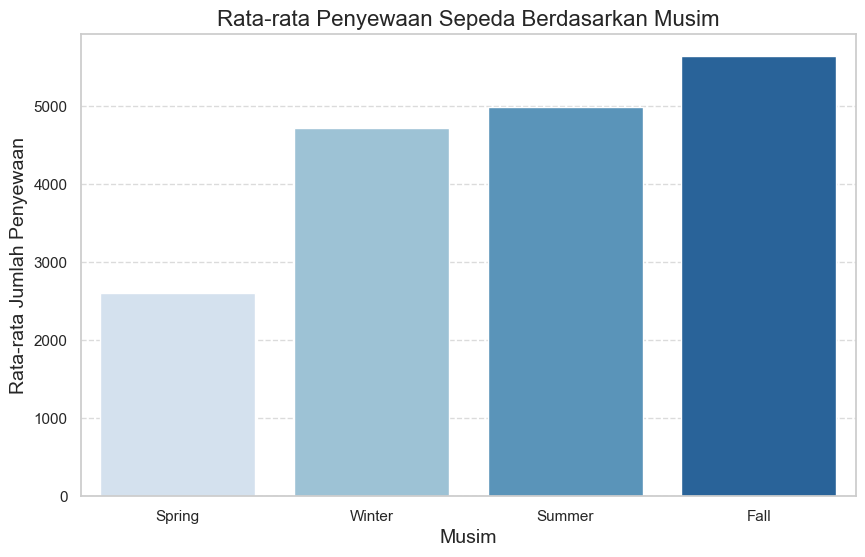

In [330]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x="season_x", y="cnt_x", data=ratarata_trend_musim,
    hue="season_x",
    palette=sns.color_palette("Blues", len(ratarata_trend_musim)),
    legend=False  
)

plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim", fontsize=16)
plt.xlabel("Musim", fontsize=14)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

**insight :**
musim gugur merupakan musim dengan rata rata penyewa terbanyak

**Pertanyaan 2: Seberapa besar perbedaan rata-rata jumlah penyewaan sepeda antara hari kerja dan akhir pekan dalam setahun terakhir?**

In [331]:
label_trend_hari = {0: "Akhir Pekan", 1: "Hari Kerja"}

In [332]:
ratarata_trend_hari = all_data.groupby("workingday_x")["cnt_x"].mean().reset_index()

In [333]:
all_data["workingday_x"] = all_data["workingday_x"].map(label_trend_hari)

In [334]:
ratarata_trend_hari = ratarata_trend_hari.sort_values(by="cnt_x", ascending=True)

Membuat barplot ratarata_trend_hari

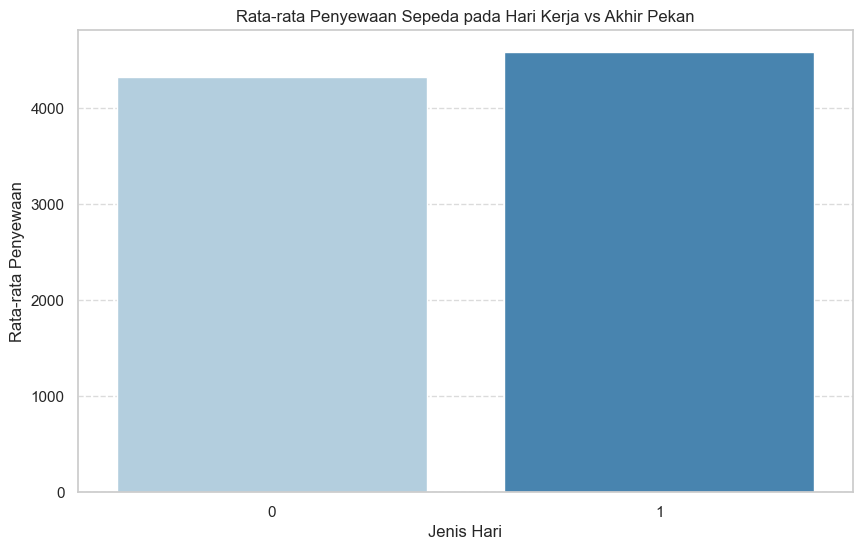

In [335]:
plt.figure(figsize=(10,6))

sns.barplot(
    x="workingday_x", y="cnt_x", data=ratarata_trend_hari,
    hue="workingday_x",
    palette=sns.color_palette("Blues", len(ratarata_trend_hari)),
    legend=False  
)

# Mengatur tampilan
plt.title("Rata-rata Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan")
plt.xlabel("Jenis Hari")
plt.ylabel("Rata-rata Penyewaan")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**insight:**
rata rata penyewa di hari kerja dan akhir pekan tidak memiliki perbedaan yang signifikan, namun rata rata penyewa dihari kerja lebih banyak dari pada diakhir pekan

**Pertanyaan 3: Bagaimana cuaca mempengaruhi jumlah penyewaan sepeda?**

In [336]:
trend_cuaca = all_data.groupby("weathersit_x")["cnt_x"].mean().reset_index()
trend_cuaca.head(10)

,weathersit_x,cnt_x
0,1,4876.786177
1,2,4035.862348
2,3,1803.285714


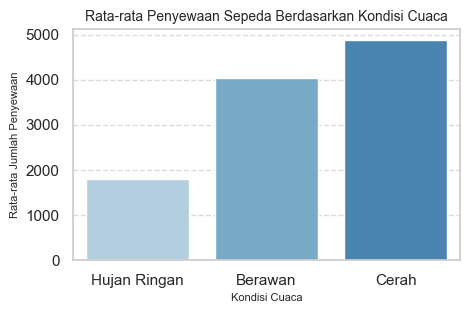

In [337]:
# Mapping label cuaca
weather_labels = {
    1: "Cerah",
    2: "Berawan",
    3: "Hujan Ringan",
    4: "Hujan Deras"
}

# Pastikan kolom "Cuaca" sudah ada
trend_cuaca["Cuaca"] = trend_cuaca["weathersit_x"].map(weather_labels)

# Urutkan berdasarkan nilai penyewaan agar warna sesuai
trend_cuaca = trend_cuaca.sort_values(by="cnt_x", ascending=True)

# Gunakan subset warna dari palet "Blues" agar warna tidak terlalu pucat
num_colors = len(trend_cuaca)
color_palette = sns.color_palette("Blues", num_colors + 2)[1:]  # Skip warna paling pucat

# Buat mapping warna berdasarkan kondisi cuaca
colors = dict(zip(trend_cuaca["Cuaca"], color_palette))

# Membuat barplot dengan warna yang lebih seimbang
plt.figure(figsize=(5, 3))
sns.barplot(
    x="Cuaca", 
    y="cnt_x", 
    hue="Cuaca",
    data=trend_cuaca, 
    palette=colors,  # Gunakan warna yang sudah diatur
    legend=False
)

# Mengatur tampilan plot
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca", fontsize=10)
plt.xlabel("Kondisi Cuaca", fontsize=8)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=8)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


**insight :**
rata rata penyewa terbanyak pada saat cuaca cerah

**Pertanyaan 4: Seberapa besar pengaruh temperatur dan kelembaban terhadap jumlah penyewaan sepeda?**

In [338]:
korelasi = all_data[['temp_x', 'hum_x', 'cnt_x']].corr()

In [339]:
korelasi.head()

,temp_x,hum_x,cnt_x
temp_x,1.000000,0.126963,0.627494
hum_x,0.126963,1.000000,-0.100659
cnt_x,0.627494,-0.100659,1.000000


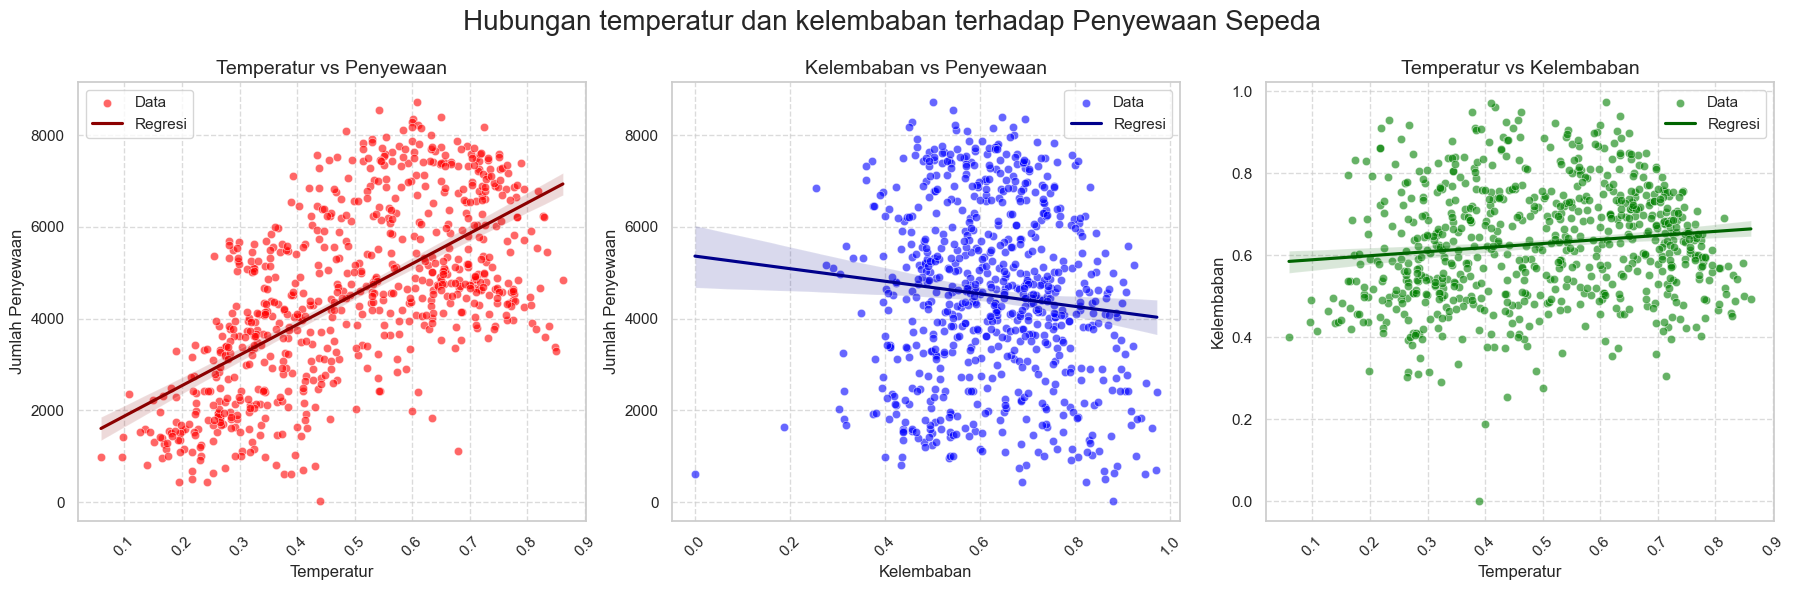

In [340]:
# Hitung korelasi
correlation = all_data[['temp_x', 'hum_x', 'cnt_x']].corr()

# Buat figure dan axes untuk 3 subplot dalam 1 baris
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot 1: Hubungan Temperatur dengan Jumlah Penyewaan Sepeda
sns.scatterplot(x=all_data["temp_x"], y=all_data["cnt_x"], alpha=0.6, color="red", label="Data", ax=ax[0]) 
sns.regplot(x=all_data["temp_x"], y=all_data["cnt_x"], line_kws={"color": "darkred"}, scatter=False, label="Regresi", ax=ax[0])
ax[0].set_title("Temperatur vs Penyewaan", fontsize=14)
ax[0].set_xlabel("Temperatur", fontsize=12)
ax[0].set_ylabel("Jumlah Penyewaan", fontsize=12)
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(True, linestyle="--", alpha=0.7)
ax[0].legend()

# Plot 2: Hubungan Kelembaban dengan Jumlah Penyewaan Sepeda
sns.scatterplot(x=all_data["hum_x"], y=all_data["cnt_x"], alpha=0.6, color="blue", label="Data", ax=ax[1])
sns.regplot(x=all_data["hum_x"], y=all_data["cnt_x"], line_kws={"color": "darkblue"}, scatter=False, label="Regresi", ax=ax[1])
ax[1].set_title("Kelembaban vs Penyewaan", fontsize=14)
ax[1].set_xlabel("Kelembaban", fontsize=12)
ax[1].set_ylabel("Jumlah Penyewaan", fontsize=12)
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(True, linestyle="--", alpha=0.7)
ax[1].legend()

sns.scatterplot(x=all_data["temp_x"], y=all_data["hum_x"], alpha=0.6, color="green", marker="o", label="Data", ax=ax[2])
sns.regplot(x=all_data["temp_x"], y=all_data["hum_x"], line_kws={"color": "darkgreen"}, scatter=False, label="Regresi", ax=ax[2])
ax[2].set_title("Temperatur vs Kelembaban", fontsize=14)
ax[2].set_xlabel("Temperatur", fontsize=12)
ax[2].set_ylabel("Kelembaban", fontsize=12)
ax[2].tick_params(axis='x', rotation=45)
ax[2].grid(True, linestyle="--", alpha=0.7)
ax[2].legend()

plt.suptitle("Hubungan temperatur dan kelembaban terhadap Penyewaan Sepeda", fontsize=20)

# Tampilkan plot
plt.tight_layout()
plt.show()


**Inshight :**
- Ada korelasi positif cukup kuat antara suhu dan jumlah penyewaan sepeda. Artinya, semakin tinggi suhu, semakin banyak orang menyewa sepeda.
- Korelasi negatif sangat lemah antara kelembaban dan jumlah penyewaan. Artinya, kelembaban tidak terlalu memengaruhi jumlah penyewaan sepeda.
- Korelasi positif sangat lemah antara suhu dan kelembaban. Artinya, suhu sedikit berhubungan dengan kelembaban, tetapi tidak signifikan.

**Pertanyaan 5: Bagaimana tren penyewaan sepeda dari tahun 2011 ke 2012?**

In [341]:
trend_sewa = all_data.groupby(["yr_y", "mnth_y"])["cnt_y"].sum().reset_index()
trend_sewa.head()

,yr_y,mnth_y,cnt_y
0,0,1,38189
1,0,2,2676


In [342]:
all_data["year"] = all_data["dteday_x"].dt.year
all_data["month"] = all_data["dteday_x"].dt.month

In [343]:
# Mengelompokkan jumlah penyewaan berdasarkan bulan dan tahun
monthly_trend = all_data.groupby(["year", "month"])["cnt_y"].sum().reset_index()

In [344]:
# Menampilkan tabel tren penyewaan sepeda per bulan
print(monthly_trend)

    year  month  cnt_y
0   2011      1   1040
1   2011      2   1310
2   2011      3   2301
3   2011      4   1668
4   2011      5   2339
5   2011      6   1593
6   2011      7    952
7   2011      8   1898
8   2011      9   1673
9   2011     10   1592
10  2011     11   1544
11  2011     12   1952
12  2012      1   1357
13  2012      2   1838
14  2012      3   2443
15  2012      4   1578
16  2012      5   1583
17  2012      6   1720
18  2012      7   2152
19  2012      8   1324
20  2012      9   1670
21  2012     10   1188
22  2012     11   1970
23  2012     12   2180


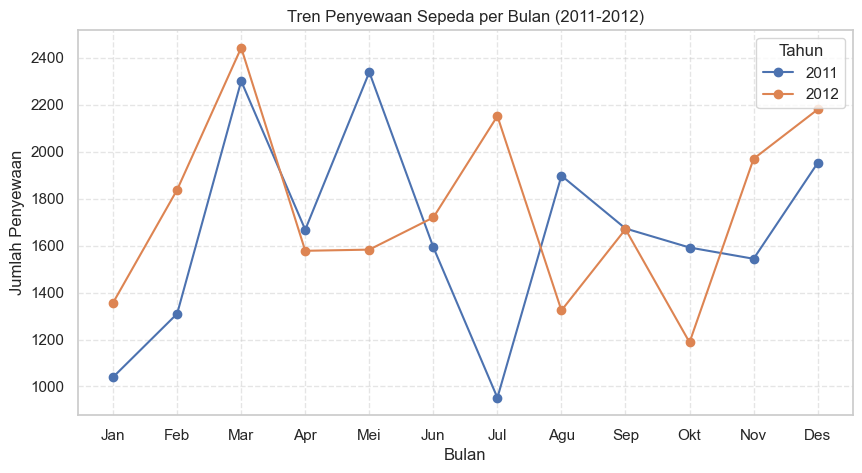

In [345]:
# Membuat line chart
plt.figure(figsize=(10, 5))

for year in [2011, 2012]:
    subset = monthly_trend[monthly_trend["year"] == year]
    plt.plot(subset["month"], subset["cnt_y"], marker="o", linestyle="-", label=str(year))

# Pengaturan tampilan
plt.title("Tren Penyewaan Sepeda per Bulan (2011-2012)")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"
])
plt.legend(title="Tahun")
plt.grid(True, linestyle="--", alpha=0.5)

# Menampilkan grafik
plt.show()


**Pola Tren Tahunan**

- Puncak Penyewaan:
  - Tahun 2011: Penyewaan tertinggi terjadi pada Maret dan Mei.
  - Tahun 2012: Penyewaan tertinggi terjadi pada Maret, Juli, dan Desember.

- Penurunan Penyewaan:
  - Tahun 2011: Penyewaan menurun tajam pada April dan Juli.
  - Tahun 2012: Penurunan drastis terjadi di April dan Oktober.

## Analisis Lanjutan (Opsional)

**Clustering**

Clustering di gunakan untuk mengelompokkan penggunaan layanan penyewaan sepeda berdasarkan waktu, sehingga di dapatkan jawaban unutuk pertanyaan

**Bagaimana pola penggunaan layanan penyewaan sepeda berdasarkan waktu?**

Manual Grouping digunakan untuk menentukan kriteria pengelompokan berdasarkan kategori waktu, yaitu pagi,siang, sore, dan, malam

In [346]:
# Fungsi kategorisasi waktu
def categorize_time(hour):
    if 6 <= hour < 10:
        return "Pagi"
    elif 10 <= hour < 14:
        return "Siang"
    elif 14 <= hour < 18:
        return "Sore"
    else:
        return "Malam"

# Terapkan fungsi ke kolom 'hr'
all_data["Waktu"] = all_data["hr"].apply(categorize_time)

In [347]:
# Hitung rata-rata 'nilai' untuk setiap kategori waktu
ratarata_kategori_waktu= all_data.groupby("Waktu")["cnt_y"].mean()

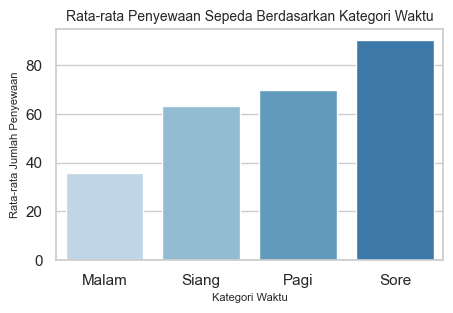

In [348]:
# Ubah hasil groupby menjadi DataFrame
ratarata_kategori_waktu = ratarata_kategori_waktu.reset_index()
ratarata_kategori_waktu = ratarata_kategori_waktu.sort_values(by="cnt_y", ascending=True)
num_colors = len(ratarata_kategori_waktu)
color_palette = sns.color_palette("Blues", num_colors + 2)[1:]  
colors = dict(zip(ratarata_kategori_waktu["Waktu"], color_palette))

plt.figure(figsize=(5, 3))
sns.barplot(
    x="Waktu", 
    y="cnt_y", 
    hue ="Waktu",
    data=ratarata_kategori_waktu, 
    palette=colors, 
    legend=False
)

# Mengatur tampilan plot
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kategori Waktu", fontsize=10)
plt.xlabel("Kategori Waktu", fontsize=8)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=8)

plt.show()


**insight** 
Permintaan Tertinggi Terjadi di Sore Hari, dan Pagi Hari Juga Memiliki Permintaan Tinggi namun masih tidak sebanyak di sore hari
- Jumlah penyewaan sepeda tertinggi terjadi pada sore hari, kemungkinan besar karena jam pulang kerja dan sekolah, serta orang-orang yang berolahraga atau rekreasi setelah aktivitas harian.
- Penyewaan sepeda pada pagi hari juga cukup tinggi, yang bisa disebabkan oleh pengguna yang berangkat kerja/sekolah atau olahraga pagi.

## Conclusion

**Dari hasil analisis, dapat disimpulkan bahwa :**

- Temuan dari analisis jumlah rata-rata penyewaan sepeda bervariasi berdasarkan musim :
    - Musim Gugur (Fall) memiliki jumlah penyewaan tertinggi, dengan angka melebihi 5.500 penyewaan rata-rata. Ini menunjukkan bahwa musim gugur adalah periode yang paling populer untuk penyewaan sepeda. Kemungkinan besar, cuaca yang lebih sejuk dan nyaman dibanding musim panas dapat menjadi faktor utama meningkatnya minat pengguna.
      
    - Musim Semi (Spring) memiliki jumlah penyewaan terendah, sekitar 2.500 penyewaan rata-rata. Faktor penyebabnya bisa jadi karena kondisi cuaca yang masih cenderung tidak stabil di awal musim dan curah hujan yang lebih tinggi, yang mengurangi minat masyarakat dalam menyewa sepeda.
 
    - Musim Panas (Summer) menempati posisi kedua tertinggi dalam jumlah penyewaan, dengan rata-rata sekitar 5.000 penyewaan. Ini wajar mengingat musim panas sering dikaitkan dengan liburan dan aktivitas luar ruangan yang meningkat.
 
    - Musim Dingin (Winter) memiliki jumlah penyewaan yang lebih tinggi dibanding musim semi, sekitar 4.500 penyewaan. Hal ini menunjukkan bahwa meskipun cuaca dingin, mungkin masih ada permintaan yang cukup besar, kemungkinan dari pengguna yang tetap aktif atau fasilitas yang memungkinkan penggunaan sepeda di musim dingin.


- Temuan dari rata-rata penyewaan sepeda pada hari kerja dan akhir pekan:
  - Jumlah penyewaan pada hari kerja lebih tinggi dibandingkan akhir pekan : Rata-rata penyewaan sepeda pada hari kerja sedikit lebih tinggi dibandingkan akhir pekan. Hal ini menunjukkan bahwa banyak orang menggunakan sepeda sebagai sarana transportasi utama untuk beraktivitas, seperti bekerja atau sekolah.
    
  - Penyewaa akhir pekan tetap tinggi, tetapi lebih rendah dibanding hari kerja : Meskipun lebih rendah dibanding hari kerja, jumlah penyewaan pada akhir pekan tetap signifikan. Ini mengindikasikan bahwa ada cukup banyak pengguna yang menyewa sepeda untuk keperluan rekreasi atau aktivitas santai di akhir pekan.

- temuan dari rata-rata penyewaan sepeda sangat dipengaruhi oleh kondisi cuaca:
    - Cuaca cerah memiliki tingkat penyewaan tertinggi: Jumlah penyewaan sepeda tertinggi terjadi saat cuaca cerah, mencapai hampir 5000 penyewaan.
Ini menunjukkan bahwa pengguna lebih cenderung menyewa sepeda saat kondisi cuaca mendukung, baik untuk keperluan transportasi maupun rekreasi.
Penyewaan berkurang saat cuaca berawan
    - Saat cuaca berawan, jumlah penyewaan menurun dibandingkan cuaca cerah tetapi masih cukup tinggi (sekitar 4000 penyewaan). Ini mengindikasikan bahwa meskipun tidak secerah biasanya, pengguna masih merasa nyaman untuk bersepeda.
Hujan ringan menyebabkan penurunan drastis dalam penyewaan
    - Saat hujan ringan, rata-rata penyewaan turun signifikan hingga hampir setengah dari kondisi cerah.
  
Hal ini menunjukkan bahwa hujan, meskipun ringan, menjadi faktor utama yang menghambat pengguna dalam menyewa sepeda.

-  temuan dari analisis Hubungan Temperatur, Kelembaban, dan Penyewaan Sepeda

    - temperatur dan kelembaban mempengaruhi jumlah penyewaan sepeda :

        Temperatur vs Penyewaan memiliki Hubungan Positif: Terlihat adanya korelasi positif yang cukup kuat antara temperatur dan jumlah penyewaan sepeda. Semakin tinggi temperatur, semakin banyak sepeda yang disewa. Hal ini masuk karena cuaca yang lebih hangat cenderung lebih nyaman untuk bersepeda dibandingkan suhu dingin.
    - Kelembaban vs Penyewaan memiliki Hubungan Negatif:

      Terdapat korelasi negatif antara kelembaban dan jumlah penyewaan sepeda. Semakin tinggi kelembaban, semakin sedikit jumlah penyewaan. Ini kemungkinan karena kelembaban tinggi sering dikaitkan dengan cuaca yang tidak nyaman (gerah atau hujan).

   - Temperatur vs Kelembaban (Grafik Kanan - Hijau) tidak memeiliki hubungan yang signifikan:
     
        Hubungan antara temperatur dan kelembaban tidak terlalu signifikan. Sedikit peningkatan temperatur tidak serta-merta menyebabkan perubahan besar pada kelembaban..

- temuan dari analisis Tren Penyewaan Sepeda per Bulan (2011-2012)

-  Pola Tren Tahunan

    - Puncak Penyewaan:

    Tahun 2011: Penyewaan tertinggi terjadi pada Maret dan Mei.

    Tahun 2012: Penyewaan tertinggi terjadi pada Maret, Juli, dan Desember.

    - Penurunan Penyewaan:

    Tahun 2011: Penyewaan menurun tajam pada April dan Juli.

    Tahun 2012: Penurunan drastis terjadi di April dan Oktober.

Penyewaan sepeda cenderung meningkat di bulan awal tahun hingga pertengahan tahun dan menjelang akhir tahun.
Musim atau faktor eksternal (misalnya cuaca atau liburan) mungkin berpengaruh terhadap naik-turunnya penyewaan.
Tahun 2012 memiliki tren yang lebih stabil dibanding 2011, di mana fluktuasi lebih drastis di 2011.

- Perbandingan antara Tahun 2011 dan 2012
  - Tahun 2012 memiliki jumlah penyewaan lebih tinggi di beberapa bulan dibandingkan 2011, terutama di: Januari, Februari, Maret, Juli, November, dan Desember.
  - Namun, ada bulan di mana 2011 memiliki penyewaan lebih tinggi, yaitu: Mei, Juni, Agustus, dan Oktober.
    
Tren penyewaan cenderung meningkat di tahun 2012 dibandingkan 2011.
Hal ini bisa menunjukkan adanya peningkatan popularitas layanan penyewaan sepeda atau faktor lain seperti perbaikan infrastruktur dan promosi.
Bulan-bulan dengan penurunan tajam mungkin terkait dengan faktor cuaca atau hari libur tertentu.
- Temuan dari analisis lanjutan clustering yaitu manual grouping:Permintaan Tertinggi Terjadi di Sore Hari, dan Pagi Hari Juga Memiliki Permintaan Tinggi namun masih tidak sebanyak di sore hari
    - Jumlah penyewaan sepeda tertinggi terjadi pada sore hari, kemungkinan besar karena jam pulang kerja dan sekolah, serta orang-orang yang berolahraga atau rekreasi setelah aktivitas harian.
     - Penyewaan sepeda pada pagi hari juga cukup tinggi, yang bisa disebabkan oleh pengguna yang berangkat kerja/sekolah atau olahraga pagi.

**Rekomendasi**

Untuk meningkatkan efektivitas layanan penyewaan sepeda berdasarkan tren permintaan tahunan, berikut adalah beberapa strategi yang dapat diterapkan
- Pada saat Musim Gugur & Musim Panas (Permintaan Tinggi)
    - Tambah jumlah sepeda di lokasi strategis.
    - Lakukan promosi khusus seperti paket langganan atau diskon untuk pengguna reguler.
- Musim Semi (Potensi Peningkatan)
    - Berikan diskon atau promosi khusus untuk menarik lebih banyak penyewa.
    - Selenggarakan event bersepeda atau kerja sama dengan komunitas lokal.
- Musim Dingin (Permintaan Rendah)
  - Sediakan perlengkapan khusus seperti sepeda dengan ban anti-selip dan jas hujan gratis.
  - Berikan diskon bagi pengguna yang tetap menyewa di musim dingin.
- Jam Sibuk (Pagi & Sore)
    - Sediakan lebih banyak sepeda untuk pekerja dan pelajar.
    - Tawarkan jalur peminjaman cepat atau reservasi bagi pelanggan reguler.
- Akhir Pekan & Hari Libur
  - Tingkatkan promosi wisata, seperti paket keluarga atau diskon grup.
  - Sediakan jenis sepeda khusus seperti sepeda tandem atau sepeda listrik untuk rekreasi.
- Hari Cerah & Berawan
  - Pastikan stok sepeda mencukupi karena permintaan lebih tinggi.
  - Tawarkan promo spesial untuk menarik lebih banyak pengguna.
- Hari Hujan & Cuaca Buruk
  - Sediakan jas hujan atau pelindung air bagi pelanggan.
  - Promosikan program alternatif, seperti diskon untuk penggunaan di lain hari
- Diskon & Promo Berjangka
  - Berikan diskon bagi pelanggan yang menyewa lebih dari satu jam.
  - Tawarkan program loyalitas untuk pelanggan setia.
  - diskon atau paket khusus untuk meningkatkan penyewaan di siang dan malam hari.
- Kolaborasi & Peningkatan Layanan
  - Bekerja sama dengan hotel, tempat wisata, atau restoran untuk paket bundling.
  - Gunakan teknologi untuk reservasi online dan pemantauan ketersediaan sepeda secara real-time.
  - Tawarkan layanan tambahan seperti peminjaman helm gratis atau paket keamanan bersepeda.
- Alokasikan lebih banyak sepeda di jam sibuk (pagi & sore).
- Pastikan kondisi sepeda optimal sebelum pagi dan sore, saat permintaan tinggi.
- Tingkatkan layanan dan keamanan di malam hari untuk menarik lebih banyak pengguna.
